In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
data_x = np.loadtxt('gesture_input_x_v11.csv', dtype=float)
data_y = np.loadtxt('gesture_input_y_v11.csv', dtype=float)

data_x.shape, data_y.shape

((314, 270), (314, 5))

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

In [4]:
# split into train and test sets
train_size = int(len(data_x) * 0.8)
test_size = len(data_x) - train_size
train_size, test_size

(251, 63)

In [5]:
train_x, test_x = data_x[0:train_size,:], data_x[train_size:,:]
train_y, test_y = data_y[0:train_size,:], data_y[train_size:,:]

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((251, 270), (251, 5), (63, 270), (63, 5))

In [7]:
# reshape input to be [samples, time steps, features]
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
# train_y = np.reshape(train_y, (train_y.shape[0], 1, train_y.shape[1]))

test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
# test_y = np.reshape(test_y, (test_y.shape[0], 1, test_y.shape[1]))


In [9]:
regularizer = tf.contrib.layers.l2_regularizer(scale=0.01)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [29]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(270, activation=tf.nn.tanh, kernel_regularizer=regularizer, input_shape=(1, 270)))
model.add(Dense(100, activation=tf.nn.relu, kernel_regularizer=regularizer))
model.add(Dense(5, activation=tf.nn.softmax))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 270)               584280    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               27100     
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 505       
Total params: 611,885
Trainable params: 611,885
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(train_x, train_y, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
251/251 [==============================] - 1s 2ms/sample - loss: 2.0166 - acc: 0.3386
Epoch 2/200
251/251 [==============================] - 0s 462us/sample - loss: 0.7666 - acc: 0.4143
Epoch 3/200
251/251 [==============================] - 0s 475us/sample - loss: 0.3545 - acc: 0.4940
Epoch 4/200
251/251 [==============================] - 0s 459us/sample - loss: 0.2296 - acc: 0.4462
Epoch 5/200
251/251 [==============================] - 0s 454us/sample - loss: 0.1826 - acc: 0.4821
Epoch 6/200
251/251 [==============================] - 0s 451us/sample - loss: 0.1607 - acc: 0.4900
Epoch 7/200
251/251 [==============================] - 0s 476us/sample - loss: 0.1532 - acc: 0.5100
Epoch 8/200
251/251 [==============================] - 0s 475us/sample - loss: 0.1456 - acc: 0.5139
Epoch 9/200
251/251 [==============================] - 0s 489us/sample - loss: 0.1385 - acc: 0.6375
Epoch 10/200
251/251 [==============================] - 0s 482us/sample - loss: 0.1374 - acc: 0.5578
E

251/251 [==============================] - 0s 449us/sample - loss: 0.0982 - acc: 0.7649
Epoch 83/200
251/251 [==============================] - 0s 465us/sample - loss: 0.0950 - acc: 0.7689
Epoch 84/200
251/251 [==============================] - 0s 429us/sample - loss: 0.0898 - acc: 0.8008
Epoch 85/200
251/251 [==============================] - 0s 446us/sample - loss: 0.0905 - acc: 0.7809
Epoch 86/200
251/251 [==============================] - 0s 491us/sample - loss: 0.0862 - acc: 0.8127
Epoch 87/200
251/251 [==============================] - 0s 466us/sample - loss: 0.0880 - acc: 0.8008
Epoch 88/200
251/251 [==============================] - 0s 460us/sample - loss: 0.0885 - acc: 0.8008
Epoch 89/200
251/251 [==============================] - 0s 445us/sample - loss: 0.0864 - acc: 0.7928
Epoch 90/200
251/251 [==============================] - 0s 467us/sample - loss: 0.0874 - acc: 0.7968
Epoch 91/200
251/251 [==============================] - 0s 461us/sample - loss: 0.0930 - acc: 0.7689
Epo

251/251 [==============================] - 0s 459us/sample - loss: 0.0918 - acc: 0.7928
Epoch 163/200
251/251 [==============================] - 0s 472us/sample - loss: 0.0947 - acc: 0.7649
Epoch 164/200
251/251 [==============================] - 0s 504us/sample - loss: 0.0799 - acc: 0.8486
Epoch 165/200
251/251 [==============================] - 0s 478us/sample - loss: 0.0795 - acc: 0.8446
Epoch 166/200
251/251 [==============================] - 0s 511us/sample - loss: 0.0830 - acc: 0.8048
Epoch 167/200
251/251 [==============================] - 0s 479us/sample - loss: 0.0820 - acc: 0.8127
Epoch 168/200
251/251 [==============================] - 0s 448us/sample - loss: 0.0938 - acc: 0.7769
Epoch 169/200
251/251 [==============================] - 0s 433us/sample - loss: 0.0845 - acc: 0.8127
Epoch 170/200
251/251 [==============================] - 0s 475us/sample - loss: 0.0978 - acc: 0.7928
Epoch 171/200
251/251 [==============================] - 0s 471us/sample - loss: 0.0802 - acc: 0

In [32]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 0s 2ms/sample - loss: 0.0972 - acc: 0.7937


[0.09715368101994197, 0.7936508]

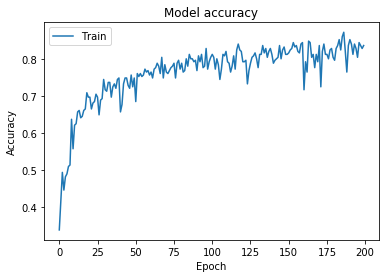

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [33]:
model.predict(test_x[10].reshape(1, 1, 270))

array([[0.09014371, 0.7600511 , 0.02487746, 0.07898857, 0.04593915]],
      dtype=float32)

In [34]:
model.save("gesture_lstm_v9.h5")